# Projet Machine-Learning par Antoine Théologien

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from module import *
from mltools import *

def train_nn(X, y, model, loss, epochs=1000, lr=0.1, batch_size=16):
    losses = []
    n = X.shape[0]  
    
    for epoch in range(epochs):
        indices = np.random.permutation(n)  
        X_shuffled, y_shuffled = X[indices], y[indices]

        epoch_loss = 0
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            y_hat = model.forward(X_batch)
            batch_loss = np.mean(loss.forward(y_batch, y_hat))
            epoch_loss += batch_loss * len(X_batch) / n 

            model.zero_grad()
            model.backward(X_batch, y_batch, loss)
            model.update_parameters(lr)

        losses.append(epoch_loss)
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {epoch_loss:.4f}")

    return losses, model


Epoch 0: Loss = 0.7808
Epoch 100: Loss = 0.5010
Epoch 200: Loss = 0.5005
Epoch 300: Loss = 0.5003
Epoch 400: Loss = 0.5002


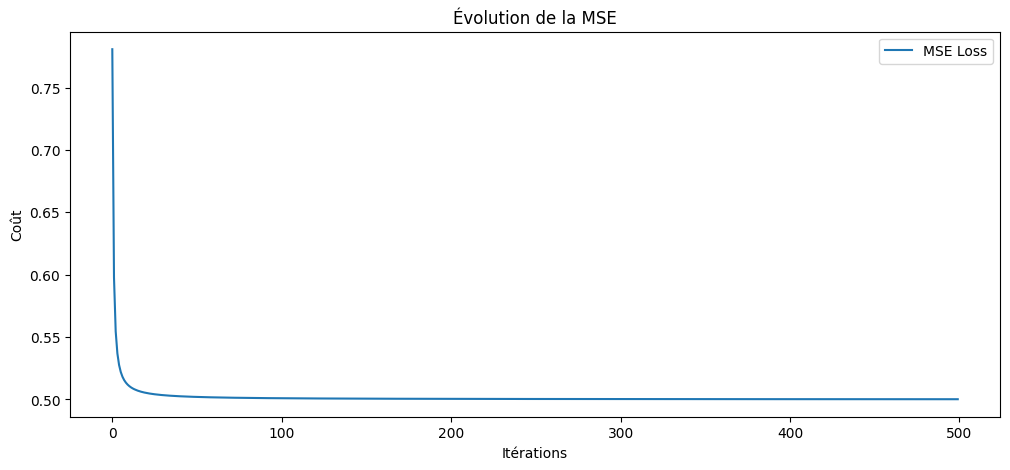

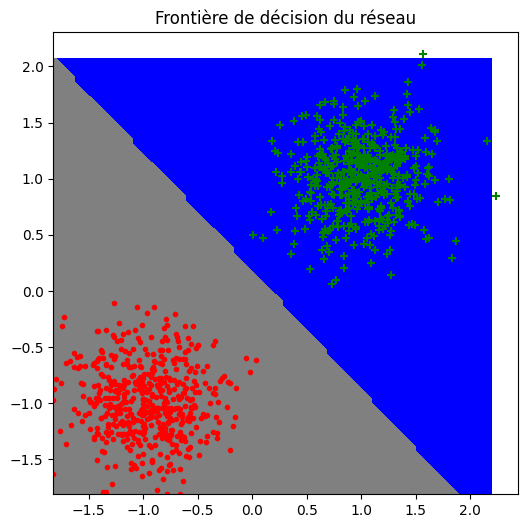

(1000, 2)
Epoch 0: Loss = 0.9593
Epoch 100: Loss = 0.7644
Epoch 200: Loss = 0.7589
Epoch 300: Loss = 0.7555
Epoch 400: Loss = 0.7539


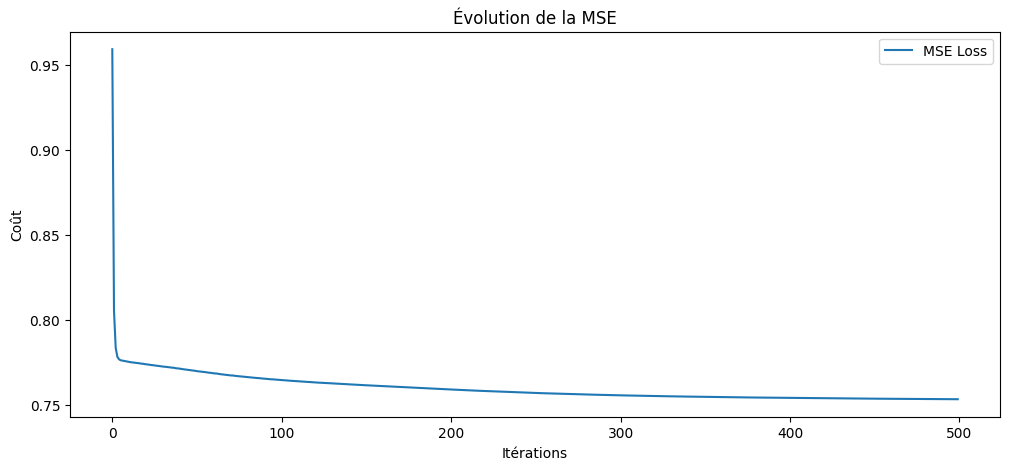

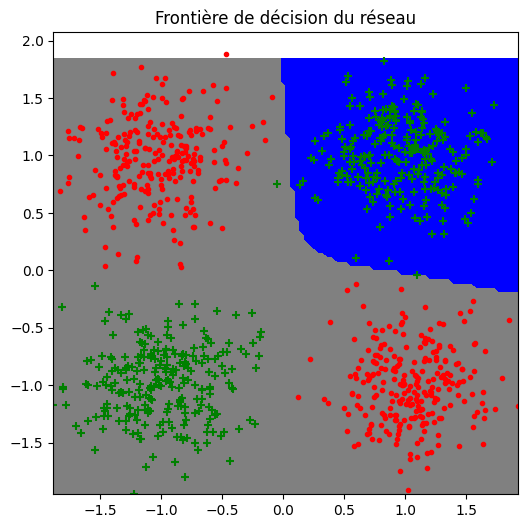

(1000, 2)
Epoch 0: Loss = 1.2674
Epoch 100: Loss = 0.9999
Epoch 200: Loss = 0.9996
Epoch 300: Loss = 0.9980
Epoch 400: Loss = 0.9889


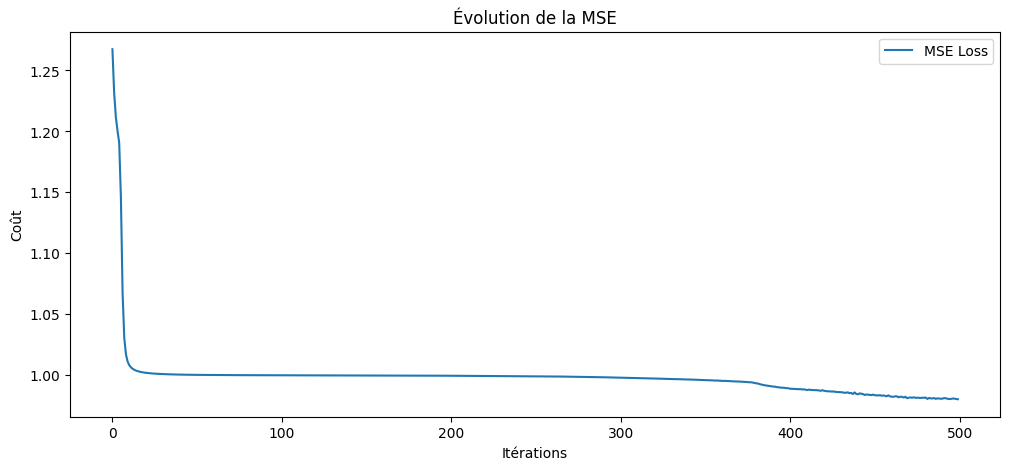

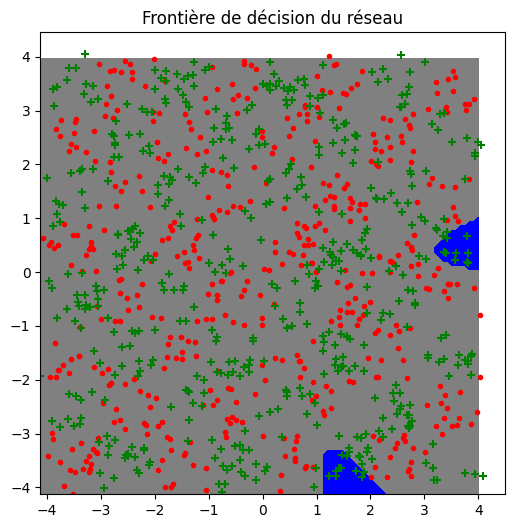

(1000, 2)


In [2]:
network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)


for i in [0,1,2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1) 

    model = network
    loss = MSELoss()

    # Entraînement
    losses, trained_model = train_nn(datax, datay, model, loss, epochs=500, lr=0.05, batch_size=16)

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision du réseau")
    plt.show()

    print(datax.shape)

In [3]:
def SGD(network, X_train, y_train, batch_size, epochs, lr):
    loss_fn = MSELoss()
    optimizer = Optim(network, loss_fn, lr)

    for epoch in range(epochs):
        indices = np.random.permutation(len(X_train))
        X_train, y_train = X_train[indices], y_train[indices]

        for i in range(0, len(X_train), batch_size):
            batch_x = X_train[i:i+batch_size]
            batch_y = y_train[i:i+batch_size]
            optimizer.step(batch_x, batch_y)

        if epoch % 10 == 0:
            y_pred = network.forward(X_train)
            loss = loss_fn.forward(y_train, y_pred)
            print(f"Epoch {epoch}: Loss = {loss.mean():.4f}")

np.random.seed(0)
X_train = np.random.randn(1000, 2)
y_train = (X_train[:, 0] * X_train[:, 1] > 0).astype(float).reshape(-1, 1)  # Classification non-linéaire

network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 1),
    Sigmoide()
)

SGD(network, X_train, y_train, batch_size=32, epochs=500, lr=0.1)

Epoch 0: Loss = 0.2935
Epoch 10: Loss = 0.1714
Epoch 20: Loss = 0.1221
Epoch 30: Loss = 0.0982
Epoch 40: Loss = 0.0853
Epoch 50: Loss = 0.0774
Epoch 60: Loss = 0.0721
Epoch 70: Loss = 0.0683
Epoch 80: Loss = 0.0653
Epoch 90: Loss = 0.0632
Epoch 100: Loss = 0.0610
Epoch 110: Loss = 0.0594
Epoch 120: Loss = 0.0580
Epoch 130: Loss = 0.0567
Epoch 140: Loss = 0.0556
Epoch 150: Loss = 0.0546
Epoch 160: Loss = 0.0536
Epoch 170: Loss = 0.0529
Epoch 180: Loss = 0.0519
Epoch 190: Loss = 0.0512
Epoch 200: Loss = 0.0505
Epoch 210: Loss = 0.0499
Epoch 220: Loss = 0.0493
Epoch 230: Loss = 0.0486
Epoch 240: Loss = 0.0481
Epoch 250: Loss = 0.0475
Epoch 260: Loss = 0.0471
Epoch 270: Loss = 0.0466
Epoch 280: Loss = 0.0462
Epoch 290: Loss = 0.0457
Epoch 300: Loss = 0.0453
Epoch 310: Loss = 0.0449
Epoch 320: Loss = 0.0444
Epoch 330: Loss = 0.0440
Epoch 340: Loss = 0.0437
Epoch 350: Loss = 0.0433
Epoch 360: Loss = 0.0429
Epoch 370: Loss = 0.0426
Epoch 380: Loss = 0.0423
Epoch 390: Loss = 0.0419
Epoch 400: 

# Pas mal !

Epoch 0: Loss = 1.0428
Epoch 100: Loss = 0.5008
Epoch 200: Loss = 0.5004
Epoch 300: Loss = 0.5002
Epoch 400: Loss = 0.5002


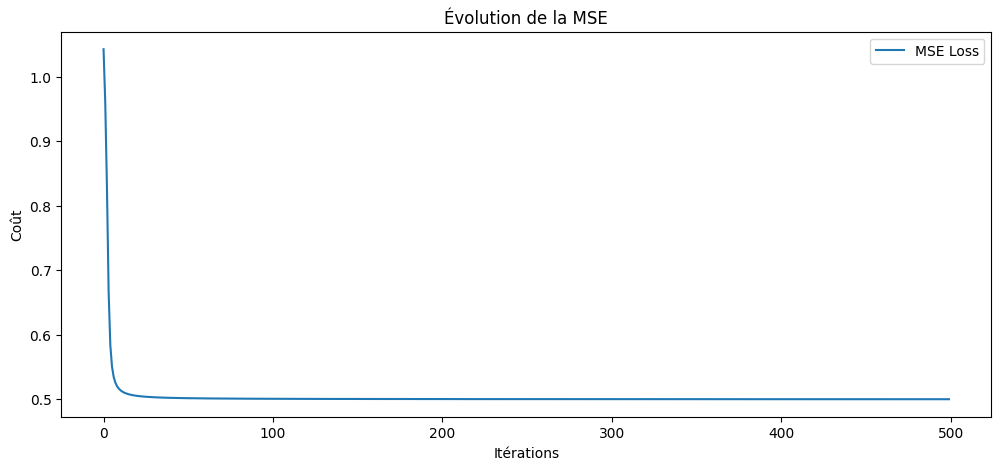

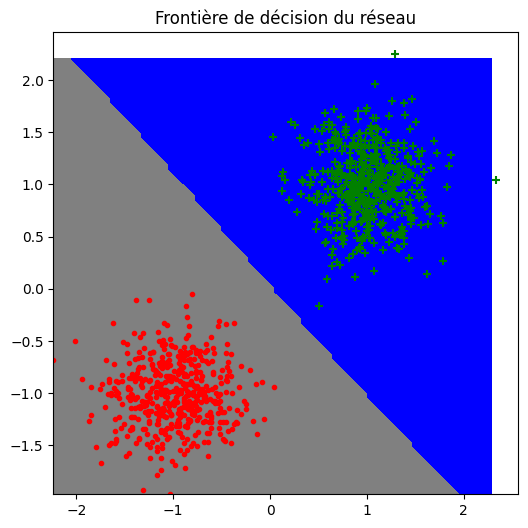

(1000, 2)
Epoch 0: Loss = 0.9320
Epoch 100: Loss = 0.7537
Epoch 200: Loss = 0.7518
Epoch 300: Loss = 0.7514
Epoch 400: Loss = 0.7512


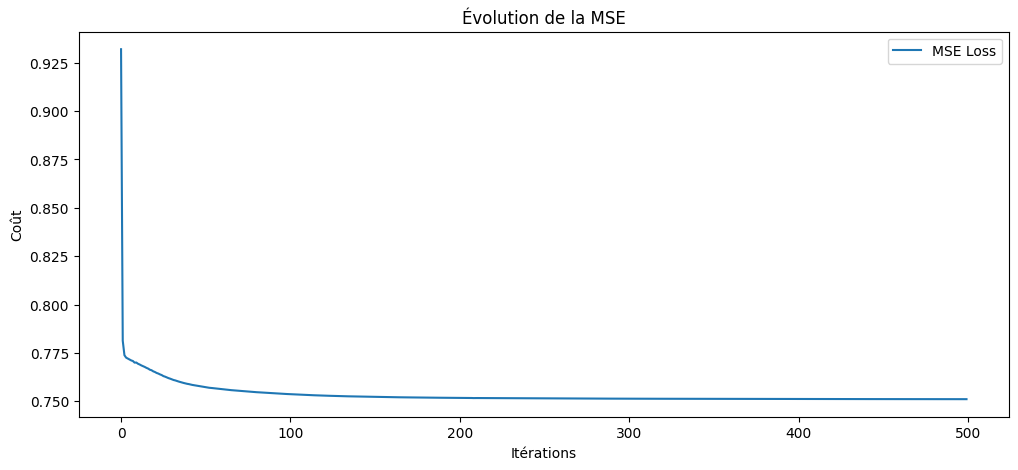

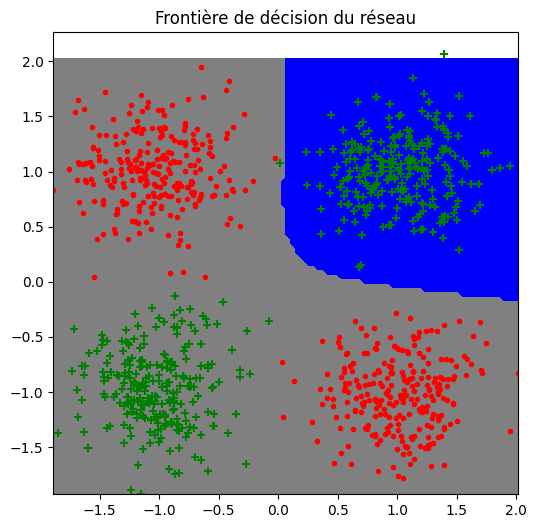

(1000, 2)
Epoch 0: Loss = 1.2333
Epoch 100: Loss = 1.0001
Epoch 200: Loss = 1.0000
Epoch 300: Loss = 1.0000
Epoch 400: Loss = 1.0000


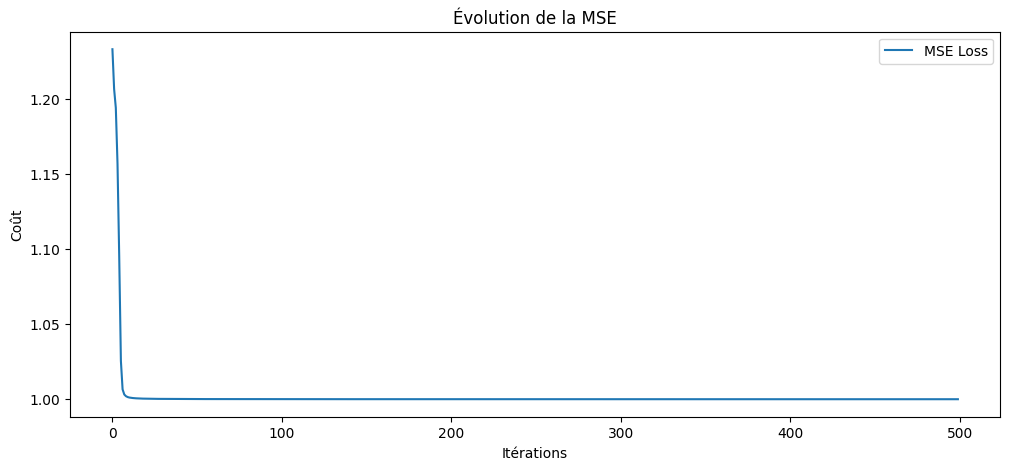

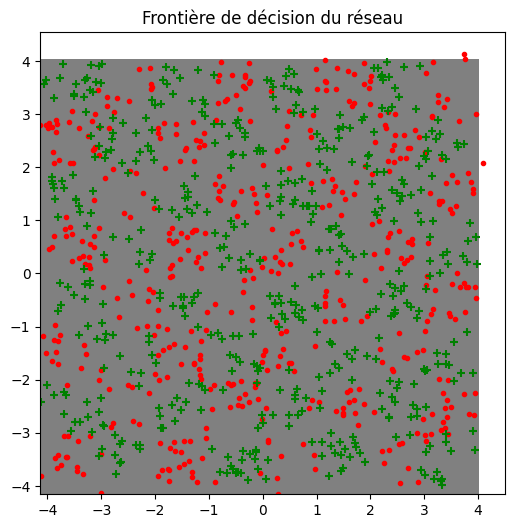

(1000, 2)


In [ ]:
network = Sequentiel(
    Linear(2, 5),
    TanH(),
    Linear(5, 10),
    TanH(),
    Linear(10,1),
    Sigmoide()
)


for i in [0,1,2]:
    datax, datay = gen_arti(data_type=i, epsilon=0.1)
    datay = datay.reshape(-1, 1) 

    model = network
    loss = MSELoss()

    # Entraînement
    losses, trained_model = train_nn(datax, datay, model, loss, epochs=500, lr=0.05, batch_size=10)

    plt.figure(figsize=(12, 5))
    plt.plot(losses, label="MSE Loss")
    plt.xlabel("Itérations")
    plt.ylabel("Coût")
    plt.title("Évolution de la MSE")
    plt.legend()
    plt.show()

    plt.figure(figsize=(6, 6))
    plot_frontiere(datax, lambda x: np.round(trained_model.forward(x)), step=100)
    plot_data(datax, datay)
    plt.title("Frontière de décision du réseau")
    plt.show()

    print(datax.shape)